In [2]:
#import pytubefix
import os

os.environ["IMAGEIO_FFMPEG_EXE"] = "/opt/anaconda3/envs/ponce/lib/python3.13/site-packages/imageio_ffmpeg/binaries/ffmpeg"

#import moviepy.editor as mp
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def download_youtube_videos(inp_csv_file, output_videos, resolution='720p', bitrate='8M'):

    vids_df = pd.read_csv(inp_csv_file)
    links, file_names = vids_df['video'].values, vids_df['video_name'].values
    starts, ends = vids_df['start'].values, vids_df['end'].values

    for link, file_name, start, end in zip(links, file_names, starts, ends):
        try:
            print(link, file_name, start, end)
            youtube = pytubefix.YouTube(link)
            video = youtube.streams.filter(res=resolution).first()
            video.download(output_path = output_videos)
            filename = video.default_filename

            os.rename(os.path.join(output_videos,filename), os.path.join(output_videos, file_name+'.mp4'))

        except Exception as e:
            print(f"Error processing video {link}: {e}")

def crop_videos(inp_csv_file, input_videos, output_cropped, bitrate= '8M'):
    vids_df = pd.read_csv(inp_csv_file)
    links, file_names = vids_df['video'].values, vids_df['video_name'].values
    starts, ends = vids_df['start'].values, vids_df['end'].values

    for link, file_name, start, end in zip(links, file_names, starts, ends):
        try:
            print(link, file_name, start, end)
            video_clip = mp.VideoFileClip(os.path.join(input_videos,file_name +'.mp4')).subclip(start, end)
            output_path = os.path.join(output_cropped, f"{file_name}.mp4")
            print('clipped')
            video_clip.write_videofile(output_path, fps=video_clip.fps, audio=False)
            print('saved')
            print(f"Cropped video saved as {file_name}")
            video_clip.close()
            #os.remove(filename)

        except Exception as e:
            print(f"Error processing video {link}: {e}")


inp_csv_file = "/Users/dysprague/Ponce_rotation/data/videos.csv"
output_video = "/Users/dysprague/Ponce_rotation/data/videos"
output_cropped = "/Users/dysprague/Ponce_rotation/data/videos_trimmed"

#download_youtube_videos(inp_csv_file, output_video)

crop_videos(inp_csv_file, output_video, output_cropped)

https://www.youtube.com/watch?v=ND92YNQv0TU macaque_running 54.0 56.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_running.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_running.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_running.mp4
saved
Cropped video saved as macaque_running
https://www.youtube.com/watch?v=mPrVMX8ACSE macaque_eating 62.0 64.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_eating.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_eating.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/macaque_eating.mp4
saved
Cropped video saved as macaque_eating
https://www.youtube.com/watch?v=IEq5flqW8FE monkey_grooming 240.0 242.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_grooming.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_grooming.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_grooming.mp4
saved
Cropped video saved as monkey_grooming
https://www.youtube.com/watch?v=641EOJCk8p8 monkey_fighting 143.0 145.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_fighting.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_fighting.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/monkey_fighting.mp4
saved
Cropped video saved as monkey_fighting
https://www.youtube.com/watch?v=7utuuiw7v0U cats_jumping 11.0 13.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/cats_jumping.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/cats_jumping.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/cats_jumping.mp4
saved
Cropped video saved as cats_jumping
https://www.youtube.com/watch?v=28FzV5OHqMU komodo 57.0 59.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/komodo.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/komodo.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/komodo.mp4
saved
Cropped video saved as komodo
https://www.youtube.com/watch?v=p6CFBpe8zws horses 28.0 30.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/horses.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/horses.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/horses.mp4
saved
Cropped video saved as horses
https://www.youtube.com/watch?v=xUmU_mVH_34 ambulance 40.0 42.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/ambulance.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/ambulance.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/ambulance.mp4
saved
Cropped video saved as ambulance
https://www.youtube.com/watch?v=_D6Zi9OlUVM fan 17.0 19.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/fan.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/fan.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/fan.mp4
saved
Cropped video saved as fan
https://www.youtube.com/watch?v=pjJBVjXhFRU soccer_ball 25.0 27.0
clipped
Moviepy - Building video /Users/dysprague/Ponce_rotation/data/videos_cropped/soccer_ball.mp4.
Moviepy - Writing video /Users/dysprague/Ponce_rotation/data/videos_cropped/soccer_ball.mp4



Moviepy - Done !
Moviepy - video ready /Users/dysprague/Ponce_rotation/data/videos_cropped/soccer_ball.mp4
saved
Cropped video saved as soccer_ball
nan nan nan nan
Error processing video nan: unsupported operand type(s) for +: 'float' and 'str'
nan nan nan nan
Error processing video nan: unsupported operand type(s) for +: 'float' and 'str'
nan nan nan nan
Error processing video nan: unsupported operand type(s) for +: 'float' and 'str'
nan nan nan nan
Error processing video nan: unsupported operand type(s) for +: 'float' and 'str'


## Separate videos into component frames

In [5]:
import cv2

In [4]:
data_dir = '/Users/dysprague/Ponce_rotation/data'

In [9]:

for file in os.listdir(os.path.join(data_dir, 'videos_trimmed')):
    if not file[-4:] == '.mp4':
        continue

    frameNr = 0

    capture = cv2.VideoCapture(os.path.join(data_dir, 'videos_trimmed', file))
 
    while (True):
    
        success, frame = capture.read()

        if not os.path.exists(os.path.join(data_dir, 'video_frames', file[:-4])):
            os.makedirs(os.path.join(data_dir, 'video_frames', file[:-4]))
    
        if success:
            cv2.imwrite(f'{data_dir}/video_frames/{file[:-4]}/frame_{frameNr}.jpg', frame)
    
        else:
            break
    
        frameNr = frameNr+1
    
    capture.release()

## Convert inverted frames back to videos

In [6]:
import cv2
import os

for folder in os.listdir(os.path.join(data_dir, 'videos_inverted')):
    if folder == '.DS_Store':
        continue
    img_folder = os.path.join(data_dir, 'videos_inverted', folder)
    video_name = folder + '.mp4'

    frames = int(len(os.listdir(img_folder))/3)

    images = [f'frame_{i}_inverted.png' for i in range(frames)]

    #images = [img for img in os.listdir(img_folder) if img.endswith("inverted.png")]
    frame = cv2.imread(os.path.join(img_folder, images[0]))
    height, width, layers = frame.shape

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_name, fourcc, len(images)/2, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(img_folder, image)))

    cv2.destroyAllWindows()
    video.release()

In [7]:
print(images)

['frame_0_inverted.png', 'frame_1_inverted.png', 'frame_2_inverted.png', 'frame_3_inverted.png', 'frame_4_inverted.png', 'frame_5_inverted.png', 'frame_6_inverted.png', 'frame_7_inverted.png', 'frame_8_inverted.png', 'frame_9_inverted.png', 'frame_10_inverted.png', 'frame_11_inverted.png', 'frame_12_inverted.png', 'frame_13_inverted.png', 'frame_14_inverted.png', 'frame_15_inverted.png', 'frame_16_inverted.png', 'frame_17_inverted.png', 'frame_18_inverted.png', 'frame_19_inverted.png', 'frame_20_inverted.png', 'frame_21_inverted.png', 'frame_22_inverted.png', 'frame_23_inverted.png', 'frame_24_inverted.png', 'frame_25_inverted.png', 'frame_26_inverted.png', 'frame_27_inverted.png', 'frame_28_inverted.png', 'frame_29_inverted.png', 'frame_30_inverted.png', 'frame_31_inverted.png', 'frame_32_inverted.png', 'frame_33_inverted.png', 'frame_34_inverted.png', 'frame_35_inverted.png', 'frame_36_inverted.png', 'frame_37_inverted.png', 'frame_38_inverted.png', 'frame_39_inverted.png', 'frame_40

In [8]:
videos_data = {}
total_samples = None

for folder in os.listdir(os.path.join(data_dir, 'videos_inverted')):
    if folder == '.DS_Store':
        continue
    
    img_folder = os.path.join(data_dir, 'videos_inverted', folder)
    frames = int(len(os.listdir(img_folder))/3)

    for i in range(frames):
        code = np.load(os.path.join(img_folder,f'frame_{i}_code.npy'))

        if not folder in videos_data.keys():
            videos_data[folder] = np.asarray([code])
        else:
            videos_data[folder] = np.vstack((videos_data[folder], code))

        if total_samples is None:
            total_samples = np.asarray([code])
        else:
            total_samples = np.vstack((total_samples, code))




In [9]:
print(total_samples.shape)
print([value.shape for value in videos_data.values()])

(618, 4096)
[(60, 4096), (48, 4096), (50, 4096), (120, 4096), (50, 4096), (120, 4096), (50, 4096), (60, 4096), (60, 4096)]


In [10]:
print([value.shape for value in videos_data.values()])

[(60, 4096), (48, 4096), (50, 4096), (120, 4096), (50, 4096), (120, 4096), (50, 4096), (60, 4096), (60, 4096)]


In [23]:
%matplotlib qt
fig = plt.figure()

for key, value in videos_data.items():
    diff = [np.linalg.norm(value[i+1,:]-value[i,:])/value.shape[1] for i in range(value.shape[0]-1)]

    plt.plot(np.linspace(0,2,len(diff)),diff, label=key)

plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('Time derivative in encoded space')
plt.show()

In [18]:
fig = plt.figure()

for key, value in videos_data.items():
    theta = [np.arccos(np.dot(value[i+1,:] - value[i,:], value[i,:]-value[i-1,:])/(np.linalg.norm(value[i+1,:] - value[i,:])* np.linalg.norm(value[i,:] - value[i-1,:]))) for i in range(1,value.shape[0]-1)]

    plt.plot(np.linspace(0,2,len(theta)),theta, label=key)

plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('Angle between directions of subsequent frames in encoding space')
plt.show()

In [22]:
fig = plt.figure()

for key, value in videos_data.items():
    diff = [np.linalg.norm(value[i,:]-value[30,:])/value.shape[1] for i in range(value.shape[0])]

    plt.plot(np.linspace(0,2,len(diff)),diff, label=key)

plt.legend()
plt.xlabel('time (seconds)')
plt.ylabel('distance from original frame in encoded space')
plt.show()

In [48]:
pca = PCA()

pca = pca.fit(total_samples)

In [49]:
pca_code = {} 

for key, value in videos_data.items():

    reduced = pca.transform(value)

    pca_code[key] = reduced

In [50]:
print([value.shape for value in pca_code.values()])

[(60, 618), (48, 618), (50, 618), (120, 618), (50, 618), (120, 618), (50, 618), (60, 618), (60, 618)]


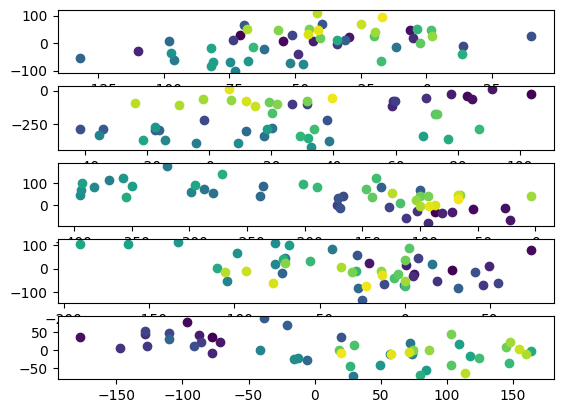

In [84]:
fig, axs = plt.subplots(5)

code = pca_code['cats_jumping']

n_points = code.shape[0]

colors = cm.viridis(np.linspace(0,1,n_points))

for j in range(n_points-1):
    axs[0].scatter(code[j,0], code[j,1], color=colors[j])
    axs[1].scatter(code[j,2], code[j,3], color=colors[j])
    axs[2].scatter(code[j,4], code[j,5], color=colors[j])
    axs[3].scatter(code[j,6], code[j,7], color=colors[j])
    axs[4].scatter(code[j,8], code[j,9], color=colors[j])

plt.show()



In [53]:
import matplotlib.pyplot as plt

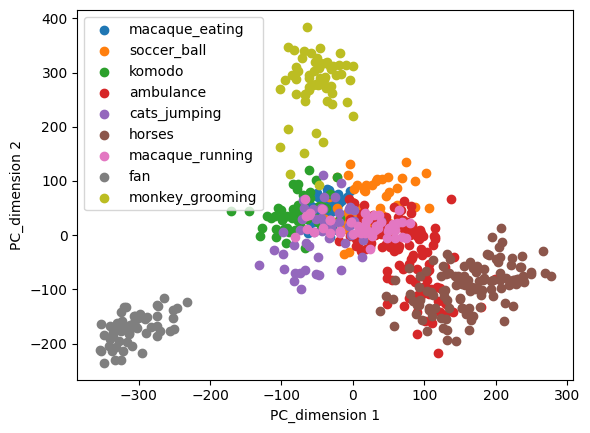

In [79]:
fig = plt.figure()

for key, value in pca_code.items():

    plt.scatter(value[:,0], value[:,1], label=key)

plt.legend()
plt.xlabel('PC_dimension 1')
plt.ylabel('PC_dimension 2')
plt.show()

In [80]:
import matplotlib.cm as cm

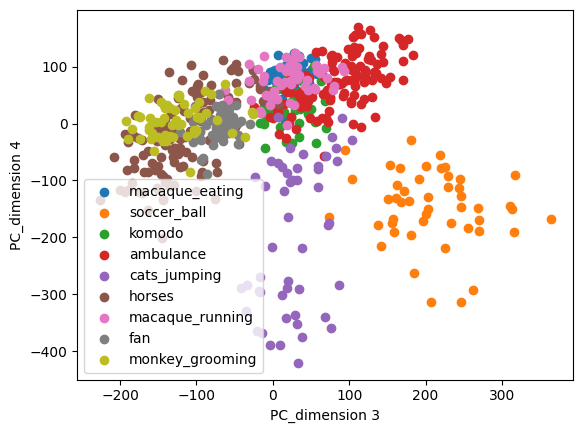

In [74]:

fig = plt.figure()

for key, value in pca_code.items():

    plt.scatter(value[:,2], value[:,3], label=key)

plt.legend()
plt.xlabel('PC_dimension 3')
plt.ylabel('PC_dimension 4')
plt.show()

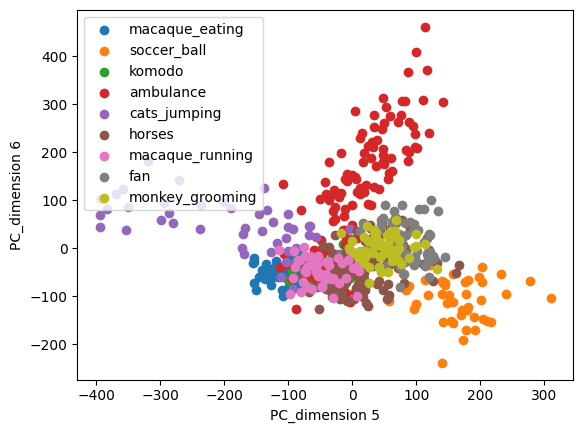

In [75]:

fig = plt.figure()

for key, value in pca_code.items():

    plt.scatter(value[:,4], value[:,5], label=key)

plt.legend()
plt.xlabel('PC_dimension 5')
plt.ylabel('PC_dimension 6')
plt.show()